First 5 rows of the dataset:
                     CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Date       Time                                                                
2004-03-10 18:00:00     2.6      1360.00     150.0  11.881723        1045.50   
           19:00:00     2.0      1292.25     112.0   9.397165         954.75   
           20:00:00     2.2      1402.00      88.0   8.997817         939.25   
           21:00:00     2.2      1375.50      80.0   9.228796         948.25   
           22:00:00     1.6      1272.25      51.0   6.518224         835.50   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Date       Time                                                     
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
           19:00:00    103.0       1173.75     92.0       1558.75   
           20:00:00    131.0       1140.00    114.0       1554.50   
           21:00:00    172.0       1092.00    122.0       1583.75

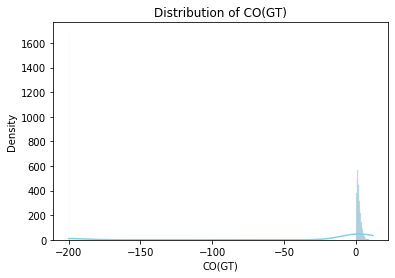

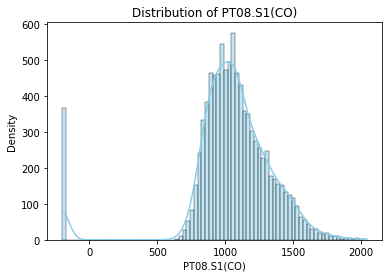

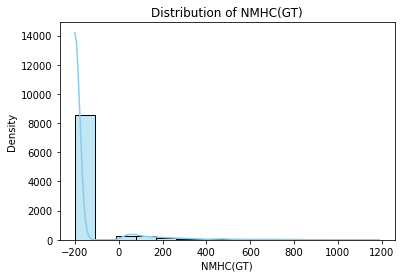

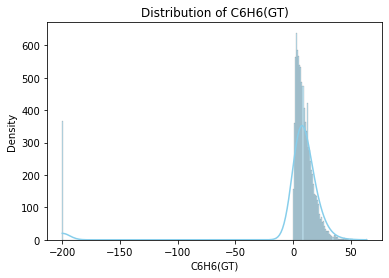

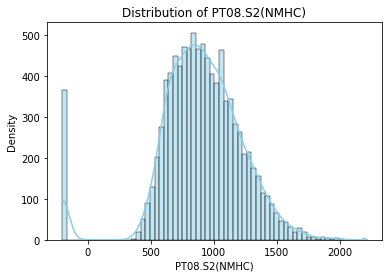

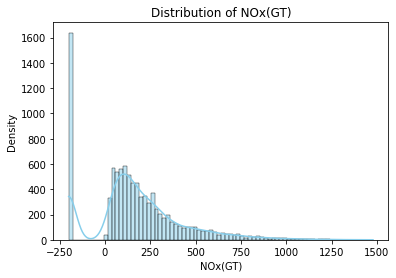

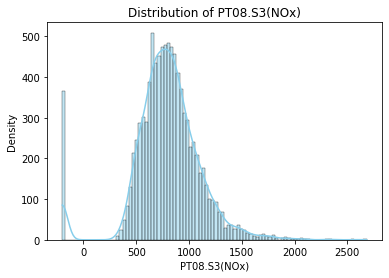

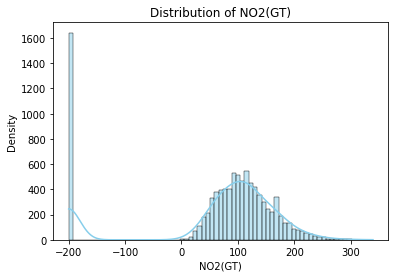

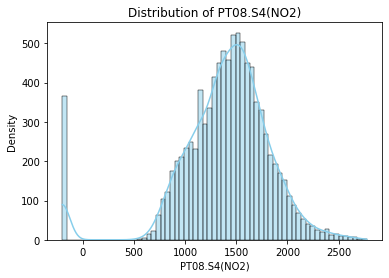

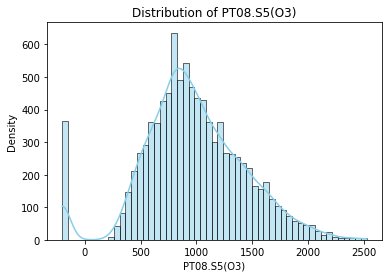

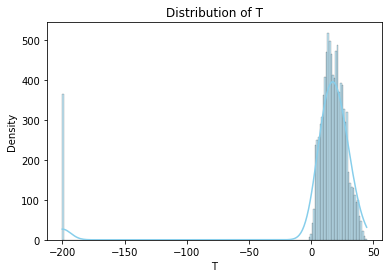

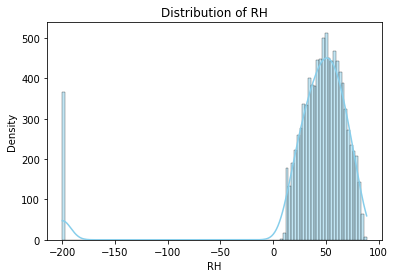

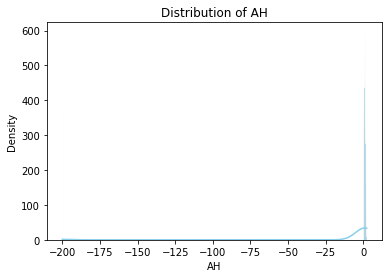

In [38]:
from data_processing import file_reader, standard_eda
import numpy as np
import pandas as pd

# Read the Excel file using file_reader
file_path = "C:/Users/Romario Mason/OneDrive/Documents/GitHub/Portfolio_23/Forecasting/Air Quality/Data/AirQualityUCI.xlsx"

def load_data(file_path):
    # Read the Excel file
    data = pd.read_excel(file_path)

    # Convert date and time columns to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

    # Set the date and time columns as the index
    data.set_index(['Date', 'Time'], inplace=True)

    return data
load_data(file_path)

# Perform standard EDA using standard_eda
standard_eda(data)


In [39]:
def check_outliers(data, threshold=3):
    # Compute z-scores for each numerical column
    z_scores = pd.DataFrame()
    for col in data.select_dtypes(include=[np.number]):
        z_scores[col] = (data[col] - data[col].mean()) / data[col].std()

    # Find outliers based on the threshold
    outliers = data[(z_scores > threshold) | (z_scores < -threshold)].dropna()

    return outliers

outliers = check_outliers(data, threshold=3)

print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 0


In [40]:
def check_missing_values(data):
    # Check for missing values
    missing_values = data.isnull().sum()

    # Print the summary
    if missing_values.sum() == 0:
        print("No missing values found.")
    else:
        print("Missing Values:")
        print(missing_values)

        # Visualize missing values using a heatmap
        import seaborn as sns
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
        plt.title("Missing Values")
        plt.show()


check_missing_values(data)

No missing values found.


In [41]:
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)


KeyError: "['Unnamed: 15' 'Unnamed: 16'] not found in axis"

In [44]:
print(data)

                     CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Date       Time                                                                
2004-03-10 18:00:00     2.6      1360.00     150.0  11.881723        1045.50   
           19:00:00     2.0      1292.25     112.0   9.397165         954.75   
           20:00:00     2.2      1402.00      88.0   8.997817         939.25   
           21:00:00     2.2      1375.50      80.0   9.228796         948.25   
           22:00:00     1.6      1272.25      51.0   6.518224         835.50   
...                     ...          ...       ...        ...            ...   
NaT        NaN          2.2      1070.75    -200.0  11.932060        1047.25   
           NaN          2.2      1070.75    -200.0  11.932060        1047.25   
           NaN          2.2      1070.75    -200.0  11.932060        1047.25   
           NaN          2.2      1070.75    -200.0  11.932060        1047.25   
           NaN          2.2      1070.75

In [46]:
import matplotlib.pyplot as plt


def visualize_columns_over_period(data):
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Set 'Date' as the index
    data.set_index('Date', inplace=True)
    
    # Plot each column
    for column in data.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[column])
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.title(f'{column} over Period')
        plt.xticks(rotation=45)
        plt.show()

In [47]:
visualize_columns_over_period(data)

KeyError: 'Date'